Running Python code requires a running Python kernel. Click the {fa}`rocket` --> {guilabel}`Live Code` button above on this page, and run the code below.

```{warning}
🚧 This site is under construction! As of now, the Python kernel may not run on the page or have very long wait times. Also, expect typos.👷🏽‍♀️
```

(sup_reg_ex)=
# Example: Supervised Regression App

To predict a number for a feature contained in the data, use a supervised *regression* method (but not [logistic regression](task1:choosing_topic:logistic)). 

For this example, we'll slightly modify the problem from the [previous example](sup_class_ex). Instead of the category *type*, we'll predict the number *sepal-length*.  

In [1]:
#We'll import libraries as needed, but when submitting, 
# it's best having them all at the top.
import pandas as pd

# Load this familiar dataset:
url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/iris.csv"
df = pd.read_csv(url) #read CSV into Python as a DataFrame

#Attach column names to the dataframe
column_names = ['sepal-length', 'sepal-width', 'petal-length', 'petal-width', 'type']
df = pd.read_csv(url, names = column_names) #read CSV into Python as a DataFrame
pd.options.display.show_dimensions = False #suppresses dimension output

##preserves Jupyter preview style (the '...') after applying .style
def display_df(dataframe, column_names, highlighted_col, precision=2):
    pd.set_option("display.precision", 2)
    columns_dict = {}
    for i in column_names:
        columns_dict[i] ='...'
    df2 = pd.concat([dataframe.iloc[:5,:],
                       pd.DataFrame(index=['...'], data=columns_dict),
                       dataframe.iloc[-5:,:]]).style.format(precision = precision).set_properties(subset=[highlighted_col], **{'background-color': 'yellow'})
    pd.options.display.show_dimensions = True
    display(df2)
    
#display df with highlighted column 
display_df(df, column_names, 'sepal-length', 1)

,sepal-length,sepal-width,petal-length,petal-width,type
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


The highlighted numbers, 'sepal-length,' provides something to predict (dependent variables), and the non-highlighted columns are something by which to make that prediction (independent variables). The big differences from the previous example are as follows:

- **Data processing** (maybe) if we choose to include *type* as an independent variable, it'll need to be converted from categorical data into numbers the model can use. 
- **Model Development** As we'll be predicting a number, a *regression* method will be used instead of a classification method.  
- **Accuracy Metric** instead of a simple percentage, we'll need a measurement of how close the data fits the model. e.g., mean squared error.  

## Data Exploring and Processing

As the data is identical, this step will be similar to what was done in the [previous example](sup_class_ex:data); please refer to it. Focusing on the *sepal length*, we can certainly see patterns:      

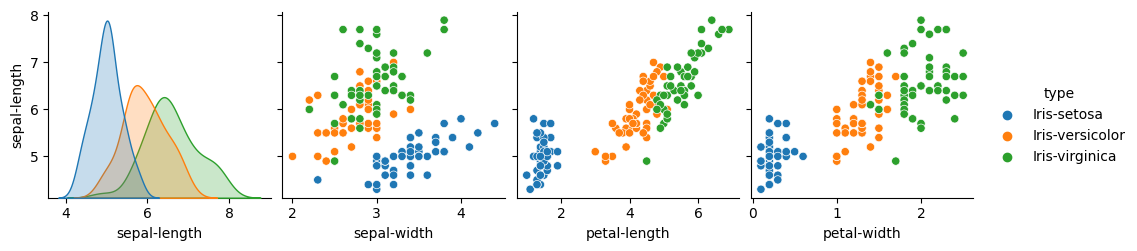

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

#correlogram
sns.pairplot(df, y_vars=['sepal-length'], hue='type')
plt.show()